##**Linear Regression and Logistic Regression with Python - Exercise Solutions**



#Linear Regression

Estimate a linear regression model using the US county level cancer dataset. The target (dependent) variable is the TARGET_deathRate. Report the coefficient estimates and the prediction performece metrics such as mean squared error, training error and test error.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import data_table

data_table.enable_dataframe_formatter()


url = 'https://drive.google.com/file/d/1jRegjlnPnpa-RnnqoXJ8UeiIbPtYm_hb/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url, encoding='latin-1')
data.drop(columns= ["avgAnnCount", "avgDeathsPerYear", "binnedInc", "Geography"], axis=1, inplace=True)
data

,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,48.8,2.08,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,2.90,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,3.04,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,40.5,2.56,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [ ]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler instance
scaler = StandardScaler()

#Fit the scaler on the entire DataFrame and transform it
data_scaled_array = scaler.fit_transform(data)

# Convert the scaled array back to a DataFrame with the same column names
df = pd.DataFrame(data_scaled_array, columns=data.columns)
df 

,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.496057,0.761321,1.232312,0.478696,-0.886102,0.650277,-0.131848,-0.511128,-0.084151,0.140614,...,NaN,0.042734,-0.427608,-0.857336,-0.113862,-0.448196,1.367088,-0.039818,0.245324,0.241011
1,-0.625801,-0.672179,0.088363,-0.180448,0.268698,-0.249816,-0.270930,-1.410622,-1.595872,-0.325473,...,0.530330,0.254461,-0.657187,-0.644641,0.340912,-0.560060,0.380201,0.499790,-0.893428,-0.658382
2,-0.142865,-1.806881,0.189790,-0.248055,-0.355519,-0.203646,-0.006012,0.847682,0.690607,0.327049,...,-0.491400,-0.666550,0.745793,0.304306,0.444328,-0.575848,-0.301959,0.217176,0.487085,-0.962391
3,0.581539,-0.327553,-0.234279,-0.081322,0.034617,0.353585,-0.054580,0.503195,0.237090,0.094006,...,-0.808831,-0.655964,1.153933,0.942391,0.494549,-0.572892,-0.035483,-0.176530,-0.033835,-0.522020
4,-1.234876,-1.799549,0.240214,-0.280592,-0.683232,-0.293460,0.066840,1.574933,1.276399,-0.325473,...,-0.451721,-0.645377,0.988126,0.566084,0.638610,-0.608154,-0.225352,-0.424035,0.423570,0.582401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-1.047468,0.096804,-0.008497,-0.292683,-0.698838,-0.293460,-0.023673,0.292675,1.257502,-0.931387,...,0.639447,0.360325,-0.580660,-0.988226,0.405165,-0.362660,-0.354945,-0.080479,-0.027396,1.074398
3043,-1.029448,0.096804,0.128402,-0.199144,0.299909,0.418808,-0.328329,-1.965629,-2.030492,0.979572,...,0.480732,0.783778,-0.950537,-0.251974,-0.484758,-0.466635,1.069394,3.453599,0.116265,1.282386
3044,-0.892497,0.096804,0.338983,-0.206992,-0.293097,3.424775,-0.317291,-1.735971,-2.068285,1.305833,...,0.411294,0.699087,-1.231133,-0.399224,0.263556,-0.467569,0.023950,1.051192,0.594984,1.092368
3045,-0.132053,0.096804,0.305838,-0.234125,-0.558389,-0.293460,-0.138471,-0.511128,-0.310909,0.187223,...,0.778323,0.889642,-0.861256,-0.857336,0.565440,-0.545784,-0.386740,0.042156,1.101742,0.978415


In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

def linear_regression(df, method='least_squares', regularization='none', test_size=0.2, epochs=1000, learning_rate=0.01):
    # Extract feature matrix and target variable
    X = df.iloc[:, 1:].values
    Y = df.iloc[:, 0].values

    # Split data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Add a column of ones for the intercept term
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    X_test = np.column_stack((np.ones(len(X_test)), X_test))

    errors = {'train': [], 'test': []}

    # Estimate coefficients using the specified method
    if method == 'least_squares':
        if regularization == 'none':
            coeffs = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
        elif regularization == 'lasso':
            lasso = LassoCV(cv=5, random_state=42).fit(X_train[:, 1:], Y_train)
            coeffs = np.hstack((lasso.intercept_, lasso.coef_))
        elif regularization == 'ridge':
            ridge = RidgeCV(cv=5).fit(X_train[:, 1:], Y_train)
            coeffs = np.hstack((ridge.intercept_, ridge.coef_))
        elif regularization == 'elastic':
            elastic = ElasticNetCV(cv=5, random_state=42).fit(X_train[:, 1:], Y_train)
            coeffs = np.hstack((elastic.intercept_, elastic.coef_))
        else:
            raise ValueError('Invalid regularization specified.')
    elif method in ('batch_gradient_descent', 'stochastic_gradient_descent', 'mini_batch_gradient_descent'):
        coeffs = np.zeros(X_train.shape[1])

        # Apply regularization
        if regularization == 'lasso':
            reg = lambda w: np.sign(w)
        elif regularization == 'ridge':
            reg = lambda w: w
        elif regularization == 'elastic':
            reg = lambda w: np.sign(w) + w
        elif regularization == 'none':
            reg = lambda w: 0
        else:
            raise ValueError('Invalid regularization specified.')

        for _ in range(epochs):
            if method == 'batch_gradient_descent':
                batch = X_train
                Y_batch = Y_train
            elif method == 'stochastic_gradient_descent':
                i = np.random.randint(0, len(X_train))
                batch = X_train[i, :].reshape(1, -1)
                Y_batch = np.array([Y_train[i]])
            else:  # mini_batch_gradient_descent
                i = np.random.randint(0, len(X_train) - 32)
                batch = X_train[i:i+32]
                Y_batch = Y_train[i:i+32]

            grads = -2/len(batch) * (batch.T @ (Y_batch - batch @ coeffs))
            coeffs -= learning_rate * grads
                                     
      # Record training and test errors
            errors['train'].append(mean_squared_error(Y_train, X_train @ coeffs))
            errors['test'].append(mean_squared_error(Y_test, X_test @ coeffs))
    else:
        raise ValueError('Invalid method specified.')

    # Predict using the estimated coefficients
    Y_pred_train = X_train @ coeffs
    Y_pred_test = X_test @ coeffs

    # Calculate performance metrics
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    r2_train = r2_score(Y_train, Y_pred_train)
    r2_test = r2_score(Y_test, Y_pred_test)

    # Display performance metrics
    print(f'Training set:\nMSE: {mse_train}\nR^2: {r2_train}\n')
    print(f'Test set:\nMSE: {mse_test}\nR^2: {r2_test}\n')

    # Plot predicted vs actual values
    plt.scatter(Y_test, Y_pred_test)
    plt.xlabel

    # Return performance metrics and coefficients
    return {'mse_train': mse_train, 'mse_test': mse_test, 'r2_train': r2_train, 'r2_test': r2_test}, coeffs, errors




def plot_errors(errors):
    plt.plot(errors['train'], label='Training Error')
    plt.plot(errors['test'], label='Test Error')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Test Errors across Epochs')
    plt.legend()
    plt.show()


Training set:
MSE: 0.5731499319719329
R^2: 0.4115266787345264

Test set:
MSE: 0.7099953286806243
R^2: 0.22914794350776624

Estimated coefficients: [-0.00053622  0.1691672  -0.00521317 -0.07601157  0.00363804 -0.01372457
  0.00108791 -0.03963182 -0.03074177 -0.03785883 -0.00440606 -0.01105599
  0.07898275 -0.01084707 -0.1130251   0.16777147 -0.14822873 -0.05354748
  0.10146705 -0.02491038  0.00308665  0.05922501  0.04065316  0.08859288
  0.02401433  0.00805827 -0.01124655 -0.10559162 -0.07527399 -0.01610449]


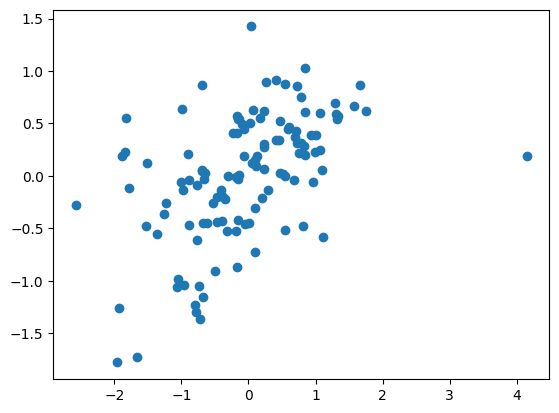

In [ ]:
reg_data = df.dropna()

performance_metrics, estimated_coeffs, errors = linear_regression(reg_data, method='stochastic_gradient_descent', regularization = 'ridge', epochs = 1000, test_size=0.2, learning_rate = 0.001)



print("Estimated coefficients:", estimated_coeffs)


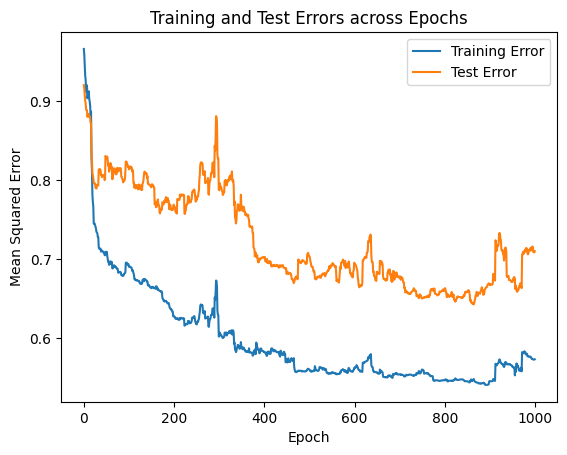

In [ ]:
plot_errors(errors)

#Logistic Regression

Train a logistic regression model of civil war onset using the dataset below.
Each row in the dataset corresponds to a territory-year instance. The target variable is 'warstds' which takes a value of 1 if there was a civil war onset within the territory-year instance. The other variables in the dataset could be used as features to predict the outcome of civil war onset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, log_loss
from sklearn.linear_model import LogisticRegression

from google.colab import data_table

data_table.enable_dataframe_formatter()


url = 'https://drive.google.com/file/d/1FAaAtMF-2spSsKvK5vvfsbsR-ghWLnhs/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url, encoding='latin-1')
data


,warstds,ptime,yrint,autonomy,rf,popdense,auto98,dem98,pol98,army85,...,mirps1,mirps2,mirps3,sxpsq,sxpsq100,pol4sq,ln_popns,proxregc,sxpnew.2,sxpsq.2
0,0,12,0,0.005151,35.481968,118.554791,3.963861,3.975114,0.011254,129472.9042,...,0.16935,0.313143,0.373714,0.052989,5.298909,61.493014,16.094110,1.432991e-01,0.094095,0.094095
1,0,24,1,0.000000,35.419919,117.756342,3.964334,3.951079,-0.013255,129413.0225,...,0.00000,1.000000,0.000000,0.052663,5.266345,100.000000,16.116295,1.000000e+00,0.094547,0.094547
2,0,36,2,0.000000,35.407984,118.280656,3.973155,3.940862,-0.032294,130431.0145,...,0.00000,1.000000,0.000000,0.052891,5.289146,100.000000,16.138290,1.000000e+00,0.095567,0.095567
3,0,48,3,0.000000,35.429719,118.325869,3.982209,3.929385,-0.052824,126781.6866,...,0.00000,1.000000,0.000000,0.052902,5.290242,100.000000,16.252539,1.000000e+00,0.101303,0.101303
4,0,60,4,0.000000,35.400103,118.312296,3.973679,3.949860,-0.023818,130979.2470,...,0.00000,1.000000,0.000000,0.052706,5.270616,100.000000,16.270645,1.000000e+00,0.092107,0.092107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,0,280,30,0.000000,59.000000,29.060539,6.000000,0.000000,-6.000000,46000.0000,...,0.00000,0.000000,0.000000,0.030631,3.063085,36.000000,16.235174,1.530000e-05,0.259141,0.259141
7136,0,292,31,0.000000,59.000000,118.015104,6.000000,0.000000,-6.000000,46000.0000,...,0.00000,0.000000,0.000000,0.037878,3.787838,36.000000,16.255079,3.810000e-06,0.452436,0.452436
7137,0,304,32,0.000000,59.000000,117.788461,5.000000,0.000000,-5.000000,46000.0000,...,0.00000,0.000000,0.000000,0.052775,5.277545,36.000000,16.274124,9.540000e-07,0.097356,0.097356
7138,0,316,33,0.000000,59.000000,119.010582,3.962030,3.970960,0.008930,46000.0000,...,0.00000,0.000000,0.000000,0.052714,5.271428,36.000000,16.293167,2.380000e-07,0.090076,0.090076


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:].values
#X = data[['warhist', 'ln_gdpen', 'lpopns', 'lmtnest', 'ncontig', 'oil', 'nwstate', 'inst3', 'pol4', 'ef', 'relfrac', 'pol4sq', 'milper', 'geo1', 'tnatwar', 'presi', 'trade', 'logpop', 'popdense']].values
#X = data[['warhist', 'ln_gdpen', 'lpopns']].values
#X = data[['warhist', 'ln_gdpen', 'lpopns', 'lmtnest', 'ncontig', 'oil', 'nwstate']].values
#data = pd.DataFrame(X) 
y = data['warstds'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=49)

log_reg = LogisticRegression(solver = 'lbfgs', penalty = 'l2',random_state=42, class_weight='balanced', max_iter = 2000)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion)

#Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Accuracy: 0.6918767507002801
Precision: 0.009216589861751152
Recall: 0.2857142857142857
F1-score: 0.017857142857142856
Confusion Matrix:
 [[984 430]
 [ 10   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82      1414
           1       0.01      0.29      0.02        14

    accuracy                           0.69      1428
   macro avg       0.50      0.49      0.42      1428
weighted avg       0.98      0.69      0.81      1428



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

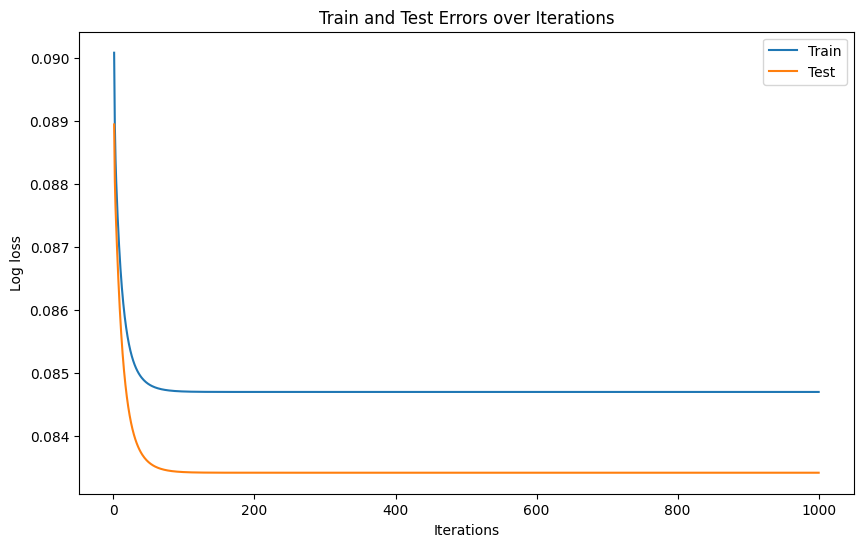

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# Create an instance of the SGDClassifier with logistic loss
sgd_clf = SGDClassifier(loss='log', random_state=42, max_iter=10, tol=None, warm_start=True, learning_rate='constant', eta0=0.01)

train_errors = []
test_errors = []
iterations = range(1, 1001)

for iteration in iterations:
    # Train the classifier for one epoch
    sgd_clf.fit(X_train, y_train)
    
    # Calculate train and test errors (log loss)
    train_error = log_loss(y_train, sgd_clf.predict_proba(X_train))
    test_error = log_loss(y_test, sgd_clf.predict_proba(X_test))

    # Store the errors
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the train and test errors
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_errors, label='Train')
plt.plot(iterations, test_errors, label='Test')
plt.xlabel('Iterations')
plt.ylabel('Log loss')
plt.title('Train and Test Errors over Iterations')
plt.legend()
plt.show()


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Choose a resampling technique
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)
sampler = SMOTE(random_state=402)

# Create a pipeline with the sampler and the logistic regression model
pipeline = make_pipeline(under_sampler, LogisticRegression(random_state=42, max_iter = 1000))

# Fit the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82      1756
           1       0.04      0.76      0.08        29

    accuracy                           0.70      1785
   macro avg       0.52      0.73      0.45      1785
weighted avg       0.98      0.70      0.81      1785



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


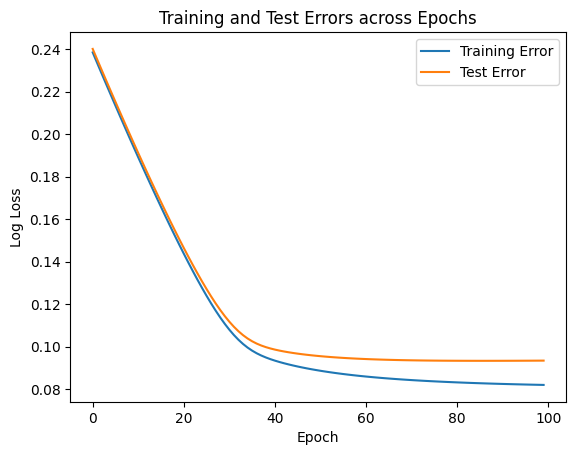


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1400
           1       0.00      0.00      0.00        28

    accuracy                           0.98      1428
   macro avg       0.49      0.50      0.50      1428
weighted avg       0.96      0.98      0.97      1428



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def plot_errors(errors):
    plt.plot(errors['train'], label='Training Error')
    plt.plot(errors['test'], label='Test Error')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title('Training and Test Errors across Epochs')
    plt.legend()
    plt.show()


def logistic_regression(df, method='batch_gradient_descent', regularization='none', test_size=0.2, epochs=1000, learning_rate=0.01):
    # Extract feature matrix and target variable
    X = df.iloc[:, 1:].values
    Y = df.iloc[:, 0].values

    # Split data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=428)

    # Add a column of ones for the intercept term
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    X_test = np.column_stack((np.ones(len(X_test)), X_test))

    errors = {'train': [], 'test': []}

    # Initialize coefficients
    coeffs = np.zeros(X_train.shape[1])

    # Define sigmoid function
    sigmoid = lambda x: 1 / (1 + np.exp(-x))

    if method == 'least_squares':
        if regularization == 'none':
            coeffs = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
        elif regularization == 'lasso':
            lasso = LassoCV(cv=5, random_state=42).fit(X_train[:, 1:], Y_train)
            coeffs = np.hstack((lasso.intercept_, lasso.coef_))
        elif regularization == 'ridge':
            ridge = RidgeCV(cv=5).fit(X_train[:, 1:], Y_train)
            coeffs = np.hstack((ridge.intercept_, ridge.coef_))
        elif regularization == 'elastic':
            elastic = ElasticNetCV(cv=5, random_state=42).fit(X_train[:, 1:], Y_train)
            coeffs = np.hstack((elastic.intercept_, elastic.coef_))
        else:
            raise ValueError('Invalid regularization specified.')

    else:  # method in ('batch_gradient_descent', 'stochastic_gradient_descent', 'mini_batch_gradient_descent')
        # Apply regularization
        if regularization == 'lasso':
            reg = lambda w: np.sign(w)
        elif regularization == 'ridge':
            reg = lambda w: w
        elif regularization == 'elastic':
            reg = lambda w: np.sign(w) + w
        elif regularization == 'none':
            reg = lambda w: 0
        else:
            raise ValueError('Invalid regularization specified.')

        for _ in range(epochs):
            if method == 'batch_gradient_descent':
                batch = X_train
                Y_batch = Y_train
            elif method == 'stochastic_gradient_descent':
                i = np.random.randint(0, len(X_train))
                batch = X_train[i, :].reshape(1, -1)
                Y_batch = np.array([Y_train[i]])
            else:  # mini_batch_gradient_descent
                i = np.random.randint(0, len(X_train) - 32)
                batch = X_train[i:i+32]
                Y_batch = Y_train[i:i+32]

            # Calculate gradients
            grads = (batch.T @ (Y_batch - sigmoid(batch @ coeffs))) / len(batch)

            # Update coefficients
            coeffs += learning_rate * grads

            # Record training and test errors
            errors['train'].append(log_loss(Y_train, sigmoid(X_train @ coeffs)))
            errors['test'].append(log_loss(Y_test, sigmoid(X_test @ coeffs)))

    # Predict probabilities using the estimated coefficients
    Y_pred_train_prob = sigmoid(X_train @ coeffs)
    Y_pred_test_prob = sigmoid(X_test @ coeffs)

    # Convert probabilities to binary predictions using a threshold of 0.5
    Y_pred_train = (Y_pred_train_prob > 0.5).astype(int)
    Y_pred_test = (Y_pred_test_prob > 0.5).astype(int)

    # Calculate performance metrics
    cm_train = confusion_matrix(Y_train, Y_pred_train)
    cm_test = confusion_matrix(Y_test, Y_pred_test)
    acc_train = accuracy_score(Y_train, Y_pred_train)
    acc_test = accuracy_score(Y_test, Y_pred_test)
    prec_train = precision_score(Y_train, Y_pred_train)
    prec_test = precision_score(Y_test, Y_pred_test)
    rec_train = recall_score(Y_train, Y_pred_train)
    rec_test = recall_score(Y_test, Y_pred_test)
                            
    # Plot training and test errors across epochs
    plot_errors(errors)

    # Return performance metrics, confusion matrices, and coefficients
    performance_metrics = {
        'train': {
            'confusion_matrix': cm_train,
            'accuracy': acc_train,
            'precision': prec_train,
            'recall': rec_train
        },
        'test': {
            'confusion_matrix': cm_test,
            'accuracy': acc_test,
            'precision': prec_test,
            'recall': rec_test
        }
    }

    return performance_metrics, coeffs, Y_test, Y_pred_test


# Example usage
performance_metrics, coeffs, Y_test, Y_pred_test = logistic_regression(data[['warstds','warhist', 'ln_gdpen', 'lpopns', 'lmtnest', 'ncontig', 'oil', 'nwstate', 'inst3', 'pol4', 'pol4sq', 'ef', 'relfrac']], method='batch_gradient_descent', regularization = 'none', test_size=0.2, epochs=100, learning_rate=0.01)

performance_metrics

report = classification_report(Y_test, Y_pred_test)
print("\nClassification Report:\n", report)
